# Problem Set #1

**Computational Electromagnetism and Applications (ΥΦΥ203)**

Implemented by: **Anastasios-Faidon Retselis (AEM: 4394)**

# Exercise 1.1

## Problem Statement

Η αριθμητική ταχύτητα φάσης στον ελεύθερο χώρο της λύσης της διακριτής μονοδιάστατης κυματικής εξίσωσης δίνεται από τη σχέση:

$$
v_{p}=\omega / \tilde{k}=\frac{2 \pi c}{\cos ^{-1}\left\{\frac{\Delta x^{2}}{(c \Delta t)^{2}}[\cos (\omega \Delta t)-1]+1\right\}} \frac{\Delta x}{\lambda_{o}}
$$

Σχεδιάστε τον λόγο της αριθμητικής προς την αναλυτική ταχύτητα φάσης (βλ. διαφάνεια 2-12 του S. Gedney) ως συνάρτηση του λόγου Δx/λ για (α) c Δt =Δx/2 και (β) c Δt = Δx/4.

## Solution

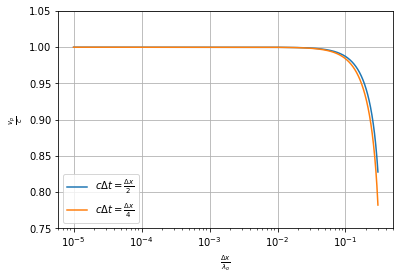

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Case a: cΔt=Δx/2

# x_values correspond to Δx/λ_ο
x_values = np.linspace(0.00001,0.3,10000)
# y_values correspond to v_ph/c

# Case a: cΔt=Δx/2
y_values = 2*np.pi/(np.arccos(4*(np.cos(np.pi*x_values)-1)+1))*x_values
plt.semilogx(x_values, y_values,label=r'$c\Delta t=\frac{\Delta x}{2}$')
plt.ylim(0,1.2)

# Case b: cΔt=Δx/4
y_values = 2*np.pi/(np.arccos(16*(np.cos(np.pi*x_values/2)-1)+1))*x_values
plt.semilogx(x_values, y_values,label=r'$c\Delta t=\frac{\Delta x}{4}$')
plt.legend()
plt.ylim(0.75,1.05)
plt.xlabel(r'$\frac{\Delta x}{\lambda_{o}}$')
plt.ylabel(r'$\frac{v_{p}}{c}$')
plt.grid()
plt.show()

# Exercise 1.2

## Problem Statement

Text goes here

## Solution

Let us first examine the **explicit** case. The explicit time-marching solution is given by the following formula:

$$
f_{i}^{n+1}=(c \Delta t)^{2}\left[\frac{f_{i+1}^{n}-2 f_{i}^{n}+f_{i-1}^{n}}{(\Delta x)^{2}}\right\rfloor+2 f_{i}^{n}-f_{i}^{n-1}+O\left[(\Delta x)^{2}\right]+O\left[(\Delta t)^{2}\right]
$$

which we can implement as a Python script using the initial and boundary conditions from the problem statement to solve the 1D FDTD Stencil. The following code is used:

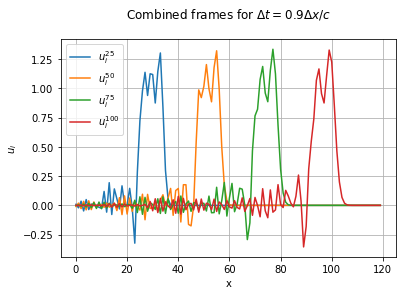

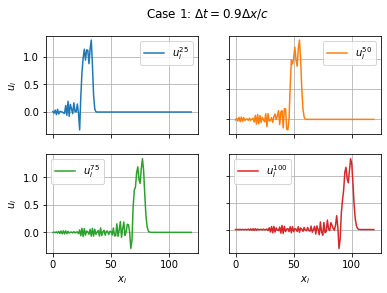

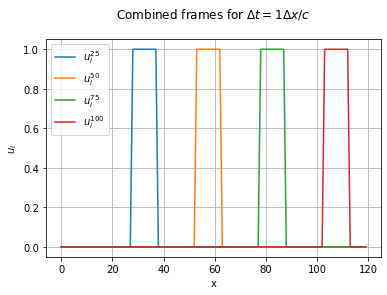

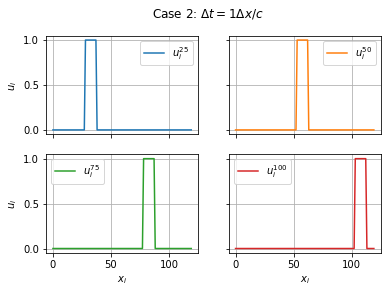

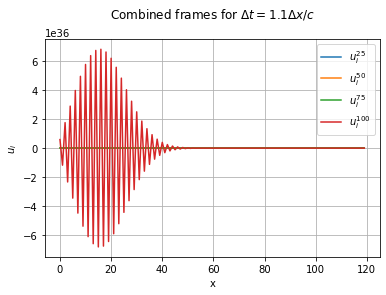

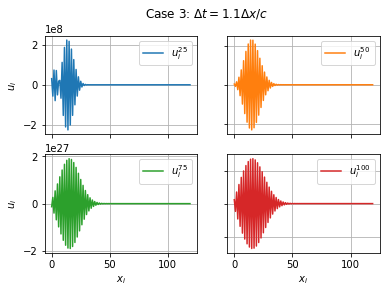

In [171]:
import numpy as np
import matplotlib.pyplot as plt

def initial_conditions(array):
    # Defines initial conditions for the problem
    # Input is a 2D array
    # Output is the 2D array with the applied initial/boundary conditions
    lower_limit = 2
    upper_limit = 11
    for i in range(lower_limit-1,upper_limit):
        array[0][i] = 1
        array[1][i+1] = 1
    return(array)

def solve_1D_FDTD_stencil(u, dx, dt):
    # Solves the 1D FDTD Stencil
    # Input is the grid in form of a 2D array w/ initial+boundary conditions
    # Output is the grid
    for n in range(1, size-1):
        for i in range(0, size-1):
            u[n+1][i] = pow(c*dt, 2)*((u[n][i+1]-2*u[n][i]+u[n][i-1])/pow(dx,2)) + 2*u[n][i] - u[n-1][i]
    return(u)

def plot_frame(array, id1, id2, id3, id4, case):
    # Extract frames from an array and plots them
    # Note that with this convention we have if we request frame number i the index of the frame is i+2
    plt.ylabel(r'$u_{i}$')
    plt.xlabel('x')
    frame1 = array[id1+2,:]
    frame2 = array[id2+2,:]
    frame3 = array[id3+2,:]
    frame4 = array[id4+2,:]
    fig1 = plt.plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    plt.plot(frame2, label=r'$u_{{i}}^{{{}}}$'.format(id2))
    plt.plot(frame3, label=r'$u_{{i}}^{{{}}}$'.format(id3))
    plt.plot(frame4, label=r'$u_{{i}}^{{{}}}$'.format(id4))
    plt.grid()
    plt.legend()
    plt.title('Combined frames for $\Delta t={}\Delta x/c$\n'.format(case))
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    axs[0, 0].grid()
    axs[0, 0].legend()
    axs[0, 1].plot(frame2, 'tab:orange', label=r'$u_{{i}}^{{{}}}$'.format(id2))
    axs[0, 1].grid()
    axs[0, 1].legend()
    axs[1, 0].plot(frame3, 'tab:green', label=r'$u_{{i}}^{{{}}}$'.format(id3))
    axs[1, 0].grid()
    axs[1, 0].legend()
    axs[1, 1].plot(frame4, 'tab:red', label=r'$u_{{i}}^{{{}}}$'.format(id4))
    axs[1, 1].grid()
    axs[1, 1].legend()
    for ax in axs.flat:
        ax.set(xlabel=r'$x$', ylabel=r'$u_{i}$')
    for ax in axs.flat:
        ax.label_outer()
    
size = 120
c = 1

# Case 1
dx = 1
a = 0.9
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = solve_1D_FDTD_stencil(u, dx, dt)

# Extract and plot frames for case 1
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 1: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 2
dx = 1
a = 1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = solve_1D_FDTD_stencil(u, dx, dt)

# Extract and plot frames for case 2
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 2: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 3
dx = 1
a = 1.1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = solve_1D_FDTD_stencil(u, dx, dt)

# Extract and plot frames for case 3
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 3: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# mpla mpla

Let us now consider the implicit case.

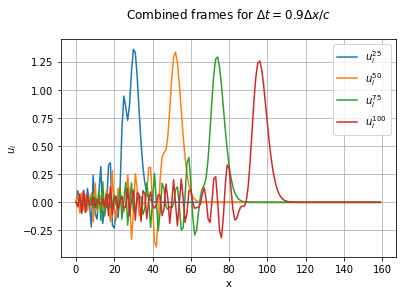

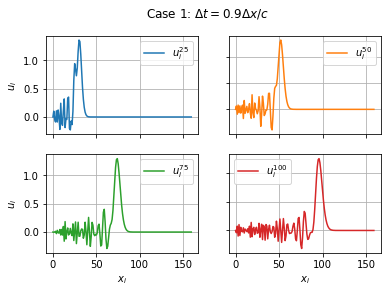

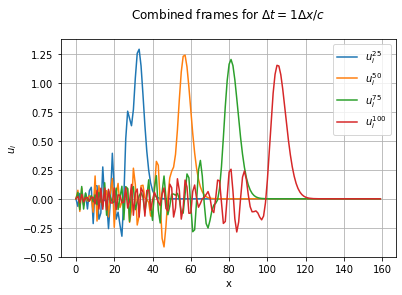

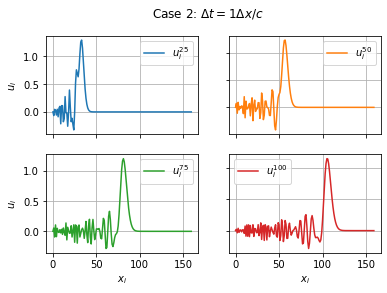

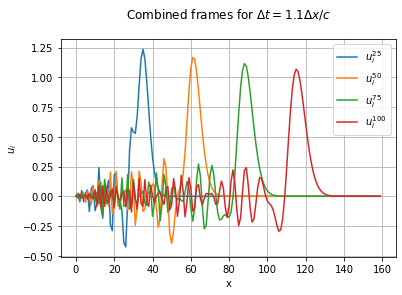

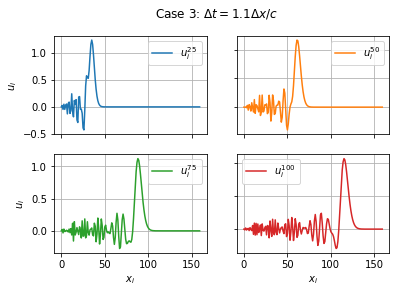

In [172]:
import numpy as np
import matplotlib.pyplot as plt

def initial_conditions(array):
    # Defines initial conditions for the problem
    # Input is a 2D array
    # Output is the 2D array with the applied initial/boundary conditions
    lower_limit = 2
    upper_limit = 11
    for i in range(lower_limit-1,upper_limit):
        array[0][i] = 1
        array[1][i+1] = 1
    return(array)

def tridiagonal_matrix(size):
    # Returns a tridiagonal matrix for the implicit solution
    # Input is size of the matrix (dimensions size x size)
    # Output is the tridiagonal matrix with 2 in main diagonal and -1 in the other two
    matrix = np.zeros((size, size))
    for columns in range(0,size):
        for rows in range(0,size):
            if columns == rows:
                matrix[rows][columns] = 2
            elif columns == rows + 1:
                matrix[rows][columns] = -1
            elif columns == rows -1:
                matrix[rows][columns] = -1
    return(matrix)

def identity_matrix(size):
    # Returns an identity matrix given a desired size
    # Input is size of the matrix (dimensions size x size)
    # Output is the corresponding identity matrix
    matrix = np.zeros((size, size))
    for columns in range(0,size):
        for rows in range(0,size):
            if columns == rows:
                matrix[rows][columns] = 1
    return(matrix)

def matrix_addition(A, B):
    # Computes and returns the result of the addition for two matrices A and B
    # Input is the two matrices
    # Output is the result of the addition
    
    # Check if addition is possible
    if (A.shape[0] != B.shape[0]):
        raise ValueError('Matrices must have same number of rows and columns!')
    if(len(B.shape) != 1):
         if A.shape[1] != B.shape[1]:
                raise ValueError('Matrices must have same number of rows and columns!')
    rows_number = A.shape[0]
    if(len(B.shape) == 1):
        columns_number = 1
    else:
        columns_number = B.shape[1]
    result_matrix = np.zeros((rows_number, columns_number)) 
    # Add matrices
    for columns in range(columns_number):
        for rows in range(rows_number):
            if len(B.shape) == 1:
                result_matrix[rows] = A[rows] + B[rows]
            else:
                result_matrix[rows][columns] = A[rows][columns] + B[rows][columns]
    return(result_matrix)        

def matrix_multiplication(A, B):
    # Computes and returns the result of the multiplication for two matrices A and B
    # Input is the two matrices
    # Output is the result of the multiplication A*B
    
    # Check if multiplication is possible
    if (A.shape[1] != B.shape[0]):
        raise ValueError('Matrix multiplication not possible!')
    if len(B.shape) == 1:
        columns_B = 1
        result_matrix = np.zeros((A.shape[0], 1))
    else:
        columns_B = B.shape[1]
        result_matrix = np.zeros((A.shape[0], B.shape[1]))
    rows_B = B.shape[0]
    rows_A = A.shape[0]
    # Multiply matrices
    for i in range(0, rows_A):
        for j in range(0, columns_B):
            for k in range(0, rows_B):
                if columns_B == 1:
                    result_matrix[i][j] += A[i][k] * B[k]
                else:
                    result_matrix[i][j] += A[i][k] * B[k][j]
    return(result_matrix)
    

def implicit_solution(grid, dx, dt, c, beta):
    size = grid.shape[1] - 2
    # Define L and I matrices
    L = tridiagonal_matrix(size)
    L_temp = beta * L
    I = identity_matrix(size)
    I = (pow(dx,2)/(c*pow(dt,2))) * I
    # Compute A, B, C and A^-1 matrices
    A = matrix_addition(L_temp,I)
    C = A
    L_temp = ((2*beta-1)/2) * L
    B = matrix_addition(L_temp, I)
    A_inverse = np.linalg.inv(A)
    # Compute the solution
    A_inverse_B = matrix_multiplication(A_inverse, B)
    A_inverse_C = matrix_multiplication(A_inverse, C)
    #A_inverse_B = np.matmul(A_inverse, B)
    #A_inverse_C = np.matmul(A_inverse, C)
    for n in range(2, len(grid)):
        f_prev = grid[n-2,1:len(grid)-1]
        f_now = grid[n-1,1:len(grid)-1]
        f_next = matrix_addition(2 * matrix_multiplication(A_inverse_B, f_now), -1 * matrix_multiplication(A_inverse_C, f_prev))
        #f_next =  np.subtract((2*np.matmul(A_inverse_B, f_now)), np.matmul(A_inverse_C, f_prev))
        # Insert f_next in grid
        for i in range(1, len(grid)-1):
            grid[n][i] = f_next[i-1]
    return(grid)

def plot_frame(array, id1, id2, id3, id4, case):
    # Extract frames from an array and plots them
    # Note that with this convention we have if we request frame number i the index of the frame is i+2
    plt.ylabel(r'$u_{i}$')
    plt.xlabel('x')
    frame1 = array[id1+2,:]
    frame2 = array[id2+2,:]
    frame3 = array[id3+2,:]
    frame4 = array[id4+2,:]
    fig1 = plt.plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    plt.plot(frame2, label=r'$u_{{i}}^{{{}}}$'.format(id2))
    plt.plot(frame3, label=r'$u_{{i}}^{{{}}}$'.format(id3))
    plt.plot(frame4, label=r'$u_{{i}}^{{{}}}$'.format(id4))
    plt.grid()
    plt.legend()
    plt.title('Combined frames for $\Delta t={}\Delta x/c$\n'.format(case))
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    axs[0, 0].grid()
    axs[0, 0].legend()
    axs[0, 1].plot(frame2, 'tab:orange', label=r'$u_{{i}}^{{{}}}$'.format(id2))
    axs[0, 1].grid()
    axs[0, 1].legend()
    axs[1, 0].plot(frame3, 'tab:green', label=r'$u_{{i}}^{{{}}}$'.format(id3))
    axs[1, 0].grid()
    axs[1, 0].legend()
    axs[1, 1].plot(frame4, 'tab:red', label=r'$u_{{i}}^{{{}}}$'.format(id4))
    axs[1, 1].grid()
    axs[1, 1].legend()
    for ax in axs.flat:
        ax.set(xlabel=r'$x$', ylabel=r'$u_{i}$')
    for ax in axs.flat:
        ax.label_outer()

size = 160
c = 1
beta = 1/4

# Case 1
dx = 1
a = 0.9
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = implicit_solution(u, dx, dt, c, beta)

# Extract and plot frames for case 1
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 1: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 2
dx = 1
a = 1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = implicit_solution(u, dx, dt, c, beta)

# Extract and plot frames for case 2
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 2: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 3
dx = 1
a = 1.1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = implicit_solution(u, dx, dt, c, beta)

# Extract and plot frames for case 3
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 3: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()